# Solutions Q1 - 7

In [7]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import quad     # integrator
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 16})  # set font size for plots

## Q1 answer
The only change that needs to be made is to replace the equation in Algorithm 1 by the new equations. The graphs are left for you to plot.

## Q2 answer
The method outlined in the example can be used for the Trapezoidal rule by changing the function definition and the limits. The integral with $20$ points is calculated as $1.635$, with $100$ points as $0.610$, and with $1000$ points as $0.6012$ which is just accurate to three decimal places. The Python integrator calculates $0.601125$ with an error of $7\cdot 10^{-10}$. Using the Simpson's rule, Algorithm 6, the answer obtained is $0.6011$ and the result is accurate to three decimal places after $300$ points; only one third as many evaluations as needed by the trapezoidal rule.

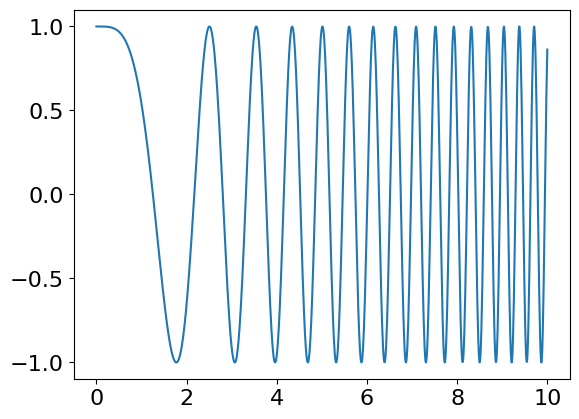

integration is  0.6102068320143317
pythod quad integrator answer  0.6011251848134458


In [8]:
#-----------------------
def trapz(f, a, b, n):        # trapezoidal rule as a subroutine.
    h = (b - a)/n
    s = 0.0
    for i in range(n+1):
        s = s + f(a + i*h)   # add values 
        pass
    s = h*(s -(f(a) + f(b))/2.0  )
    return s
#------------------------
f = lambda x: np.cos(x**2)   # define function to integrate
n = 100
a = 0.0
b = 10.0
x = np.linspace(0,10,1000)
plt.plot(x,f(x))
plt.show()

print('integration is ', trapz(f,a,b,n) )   # print result
print('pythod quad integrator answer ',quad(f,0,10)[0]  )    # use Python built-in integrator

## Q3 answer
Using Python based on equation 2  the mid-point integration (algorithm 5) gives an answer about $-207$ but this depends on the _exact_ number of points in the integration not just how large that number is. Try several values different only by one and you will see this effect with answers grouped about about three values; $-202, -207$ and $-212$. The reason appears to be that close to one the points are or are not symmetrically positioned and so do not cancel out exactly in all cases. The true answer is $-207.54$. This illustrates just how careful one has to be in numerical integration even of simple functions. Calculating in two parts, from zero to just under one and then from just over one to three can help, but in this case as the asymptote is approached very large numbers are produced which are then subtracted from one another and so rounding errors now become important. All in all a tricky numerical integration. 

## Q4 answer
(a) Using the algorithms described in the text, and starting at a lower limit of $10^{-6}$, the results with $x_m = 0.38699$ are

Mid-point : $0.0166592$,

Trapezoid : $0.0166603$,

Simpson's : $0.0166596$,

of which the last the is same to eleven decimal places as calculated by more sophisticated routines. 

(b) At a high temperatures, the upper limit to the integral $x_m$ is small, and consequently the exponential can be expanded as a series $\displaystyle e^x = 1 + x - \cdots$ making the integral $\displaystyle \int x^2dx$ in the limit of small $x$. The energy is therefore $E = 3k_BN_0T$ and the heat capacity, which is the rate of change of energy $E$ with temperature, is $C_V = 3k_B N_0$ or $3R$ per mole where $R$ is the gas constant.

At low temperatures, $x_m$ is large and tends to infinity; the integral is a complicated one to evaluate. The result is 

$$\displaystyle \int_0^\infty \frac{x^3}{e^x-1}=\frac{\pi^4}{15}=6.4939\cdots$$

Using this result the energy becomes 

$$\displaystyle \frac{3N_0}{5}\frac{(\pi k_BT)^4}{(h\nu_m)^3}$$

and at low temperatures the heat capacity varies as the cube of the temperature, 

$$\displaystyle C_V=\frac{12\pi^4N_0k_BT}{5}\left( \frac{T}{h\nu_m} \right)^3$$

## Q5 answer
Using a mid-point integration with $200$ points, the integral is calculated as $1.570855$, which compares well with the algebraic value of $\pi /2 = 1.570796$. Graphing the curve first allows an estimate of the upper limit. Making this too large leads to numerical rounding errors. 

## Q6 answer
Using Simpson's rule with $100$ points in the integration, the results for a few ratios of energies are

$$\displaystyle \begin {array}{lll}
E/E_o & \pm\text{limits} & G(E)\\
0.100  &    3.637  &   0.0023\\
0.300  &   2.420   & 0.0180\\
0.500  &   1.763   & 0.0741\\
0.700  &   1.230   & 0.2344\\
0.900  &   0.655   & 0.6339
\end{array}$$
 
When the energy is low, the ratio $E/E_0$ is small and then the probability of tunnelling is effectively zero. Only close to the barrier top does the chance of crossing become appreciable by tunnelling alone. The calculation assumes that the molecules have exactly energy $E$. In a molecule, this can be achieved by laser excitation of a single vibrational level when the molecule is isolated in the vapour phase. However if the molecules are thermalized a Boltzmann distribution of energies will exist. In this case, the chance of tunnelling has to be weighted with a Boltzmann distribution of energies and then integrated over all energies.

Doubling $\sqrt{m}/\hbar$ to $2$ has a very large effect. For instance, $G(0.1) = 5.6 \cdot 10^{-6}$ which is $\approx 400$ times smaller than when $\displaystyle \frac{\sqrt{m}}{\hbar} = 1$, which means that heavy particles (molecules or atoms) do not tunnel nearly as efficiently as light ones do. If $a$ is increased to $2$, making the barrier narrower but of the same height, and $\sqrt{m}/\hbar = 1$, then $G(0.1)=0.2$ showing that, not surprisingly, a narrow barrier is easier to tunnel through than a wide one of the same height. 

These huge differences in probability, illustrate the exponential nature of tunnelling probability, and indicate extreme sensitivity to the value of a particle's energy, and mass and the shape of the potential.

### Q7 answer
(a) As the potential is a hard sphere $U(r)=0$ if $r \ge \sigma$ then the closest approach is when $r_0 = d$, the diameter of the sphere. The scattering angle, equation (5 and 12), is 

$$\displaystyle \chi = \pi-2b\int_d^\infty \frac{1}{r^2\sqrt{1-b^2/r^2}}dr$$

Using Sympy the integral is 

In [9]:
b, r, d = symbols('b, r, d', positive = True)
f = 1/(r*sqrt(r**2-b**2))
integrate(f,r )

⎧       ⎛b⎞            
⎪ⅈ⋅acosh⎜─⎟       2    
⎪       ⎝r⎠      b     
⎪──────────  for ── > 1
⎪    b            2    
⎪                r     
⎨                      
⎪     ⎛b⎞              
⎪-asin⎜─⎟              
⎪     ⎝r⎠              
⎪─────────   otherwise 
⎪    b                 
⎩                      

where the solution is $\displaystyle\chi=\pi+2b\frac{1}{b}\sin^{-1}\left(\frac{b}{r}\right)\bigg|_d^\infty = \pi-2\sin^{-1}\left(\frac{b}{d}\right)$ because $\sin^{-1}(0)=0$.
